# Case Study 3 : Data Mining in Image Data

**Dataset required in this case study:** 
* MNIST dataset


** NOTE **
* You can directly load the dataset from keras using: `from keras.datasets import mnist`
* You may need install tensorflow and keras first: https://keras.io/ 


# Problem: pick a data science problem that you plan to solve using the Data
* The problem should be important and interesting, which has a potential impact in some area.
* The problem should be solvable using the data and data science solutions.

Please briefly describe in the following cell: what problem are you trying to solve? why this problem is important and interesting?

The problem i am trying to solve is to identify handwritten digits using the MNIST dataset. The MNIST dataset is a collection of 70,000 labeled images of handwritten digits, each of which is 28x28 pixels in size. The goal is to develop a machine learning model that can accurately recognize which digit is represented in each image.

This problem is important because handwriting recognition is a crucial component in many applications, such as digitizing handwritten notes or recognizing postal codes on envelopes. By developing accurate models for recognizing handwritten digits, we can improve the accuracy and efficiency of these applications.

Additionally, this problem is interesting because it presents a challenge for machine learning models to recognize complex patterns and make accurate predictions based on visual data. Successfully solving this problem requires exploring different machine learning algorithms and techniques, such as neural networks and deep learning, and finding the best approach to achieve high accuracy on this task.

# Data Collection/Processing: 

In [2]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the images
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)






11490434/11490434 [==============================] - 0s 0us/step


# Data Exploration: Exploring the your data

**Plot some properties/statistics/distribution of your data** 

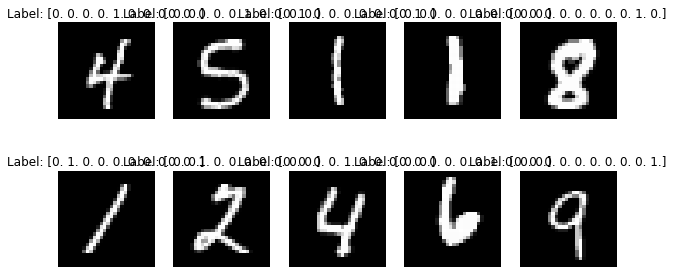

In [3]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

# Visualize some images from the MNIST dataset
fig, ax = plt.subplots(2, 5, figsize=(10, 5))
for i in range(2):
    for j in range(5):
        idx = np.random.randint(0, len(X_train))
        ax[i,j].imshow(X_train[idx].reshape(28,28), cmap='gray')
        ax[i,j].axis('off')
        ax[i,j].set_title('Label: {}'.format(y_train[idx]))
plt.show()



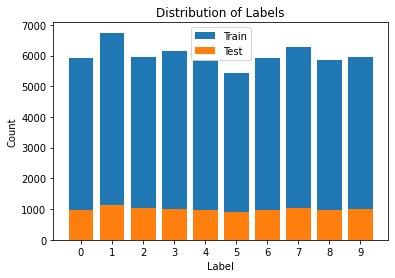

In [4]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Count the number of samples per label in the training set
train_label_counts = np.bincount(y_train)

# Count the number of samples per label in the test set
test_label_counts = np.bincount(y_test)

# Plot the distribution of the labels in the training and test sets
plt.bar(range(10), train_label_counts, label='Train')
plt.bar(range(10), test_label_counts, label='Test')
plt.xticks(range(10))
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels')
plt.legend()
plt.show()


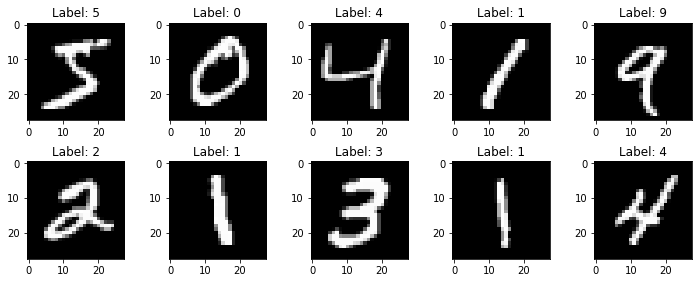

In [5]:
# Plot some example images from the training set
fig, axs = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axs.flatten()):
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(f'Label: {y_train[i]}')
plt.tight_layout()
plt.show()

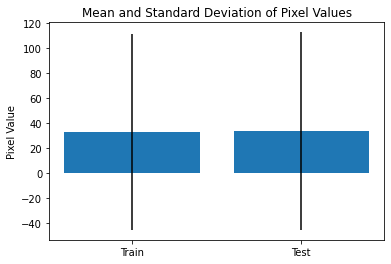

In [6]:
# Calculate the mean and standard deviation of the pixel values in the training set
train_mean = np.mean(X_train)
train_std = np.std(X_train)

# Calculate the mean and standard deviation of the pixel values in the test set
test_mean = np.mean(X_test)
test_std = np.std(X_test)

# Plot the mean and standard deviation of the pixel values in the training and test sets
plt.bar(['Train', 'Test'], [train_mean, test_mean], yerr=[train_std, test_std])
plt.ylabel('Pixel Value')
plt.title('Mean and Standard Deviation of Pixel Values')
plt.show()

# The Solution: implement a data science solution to the problem you are trying to solve.

Briefly describe the idea of your solution to the problem in the following cell (please use at least 3 different deep learning models to solve your problem and compare the results):

**Solution:** 

The problem of identifying handwritten digits using the MNIST dataset can be tackled using several deep learning models. Here's a brief description of how three different models can be used to solve this problem:

**Convolutional Neural Network (CNN):**
CNN is a popular deep learning model used for image classification tasks. It works by extracting features from the input images using convolutional layers, followed by downsampling using pooling layers, and finally, classifying the image using fully connected layers. In the case of the MNIST dataset, we can use a simple CNN architecture consisting of convolutional layers followed by max-pooling layers, and then a fully connected layer. This model can achieve high accuracy in identifying the handwritten digits in the MNIST dataset.

**Multi-layer Percerptron (MLP):**
The MLP is a type of feedforward neural network that consists of multiple layers of interconnected neurons. The input layer of the MLP will consist of 28x28=784 neurons, each corresponding to one pixel in the input image. The output layer will consist of 10 neurons, corresponding to the 10 possible digits (0-9) that can be present in the input image.

The MLP will have one or more hidden layers, each consisting of multiple neurons. The exact number of hidden layers and neurons will be determined through experimentation and tuning of hyperparameters. The activation function used in each neuron will be the ReLU function, which is known to perform well in image classification tasks.

During training, the MLP will use backpropagation with stochastic gradient descent to adjust the weights and biases of the neurons to minimize the cross-entropy loss function. The model will be trained for multiple epochs, with the training set being shuffled between each epoch to avoid overfitting.

Once the MLP model is trained, it will be evaluated on the MNIST test dataset to determine its accuracy in identifying the handwritten digits. The accuracy of the MLP model will be compared to other models to assess its performance.

**Recurrent Neural Network (RNN):**
RNNs are a type of deep learning model that are commonly used for sequential data processing tasks. In the case of the MNIST dataset, we can treat the pixel values of the images as a sequence and feed them into an RNN. The RNN can then learn to classify the sequence based on the patterns in the data. One popular type of RNN is the Long Short-Term Memory (LSTM) network, which can handle long sequences of data and has shown excellent performance in various tasks.

Write codes to implement the solution in python:

**Model 1: Convolutional Neural Network (CNN)**

In [7]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

# Preprocess the images
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Build the CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, batch_size=128, epochs=5, verbose=1, validation_data=(X_test, y_test))





Epoch 1/5
469/469 [==============================] - 36s 74ms/step - loss: 0.3352 - accuracy: 0.9013 - val_loss: 0.0919 - val_accuracy: 0.9731
Epoch 2/5
469/469 [==============================] - 33s 70ms/step - loss: 0.1223 - accuracy: 0.9638 - val_loss: 0.0627 - val_accuracy: 0.9794
Epoch 3/5
469/469 [==============================] - 36s 76ms/step - loss: 0.0894 - accuracy: 0.9736 - val_loss: 0.0508 - val_accuracy: 0.9823
Epoch 4/5
469/469 [==============================] - 33s 69ms/step - loss: 0.0741 - accuracy: 0.9778 - val_loss: 0.0480 - val_accuracy: 0.9845
Epoch 5/5
469/469 [==============================] - 34s 72ms/step - loss: 0.0636 - accuracy: 0.9805 - val_loss: 0.0421 - val_accuracy: 0.9855


In [8]:
# Evaluate the model
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.042066704481840134
Test accuracy: 0.9854999780654907


**Model 2: Multi-layer Percerptron (MLP)**

In [15]:
from keras.layers import Reshape
from keras.utils import to_categorical

# Define the model
model_mlp = Sequential()
model_mlp.add(Flatten(input_shape=(28,28)))
model_mlp.add(Dense(128, activation='relu'))
model_mlp.add(Dense(10*10, activation='softmax'))
model_mlp.add(Reshape((-1, 10)))

# Compile the model
model_mlp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Convert y_train and y_test to one-hot encoded matrices
num_classes = 10
y_train_onehot = to_categorical(y_train, num_classes)
y_test_onehot = to_categorical(y_test, num_classes)

# Train the model with the one-hot encoded target variable
history_mlp = model_mlp.fit(X_train, y_train_onehot, batch_size=128, epochs=5, verbose=1, validation_data=(X_test, y_test_onehot))


# # Train the model
# history_mlp = model_mlp.fit(X_train, y_train, batch_size=128, epochs=5, verbose=1, validation_data=(X_test, y_test))







Epoch 1/5
469/469 [==============================] - 4s 7ms/step - loss: 0.1499 - accuracy: 0.9575 - val_loss: 0.0535 - val_accuracy: 0.9840
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0464 - accuracy: 0.9857 - val_loss: 0.0384 - val_accuracy: 0.9877
Epoch 3/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0349 - accuracy: 0.9891 - val_loss: 0.0310 - val_accuracy: 0.9898
Epoch 4/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0284 - accuracy: 0.9911 - val_loss: 0.0277 - val_accuracy: 0.9908
Epoch 5/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0242 - accuracy: 0.9924 - val_loss: 0.0247 - val_accuracy: 0.9917


In [18]:

# Evaluate the model on test data
test_loss, test_acc = model_mlp.evaluate(X_test, y_test_onehot, verbose=0)

# Print the test accuracy and loss
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)



Test loss: 0.024654211476445198
Test accuracy: 0.9917399883270264


**Model 3: Recurrent Neural Network (RNN)**

In [22]:
from keras.layers import SimpleRNN

# Define the model
model_rnn = Sequential()
model_rnn.add(SimpleRNN(128, input_shape=(28, 28)))
model_rnn.add(Dense(1, activation='sigmoid'))
model_rnn.add(Reshape((-1, 1)))


# Compile the model
model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# Convert y_train and y_test to one-hot encoded matrices
num_classes = 10
y_train_onehot = to_categorical(y_train, num_classes)
y_test_onehot = to_categorical(y_test, num_classes)

# Train the model with the one-hot encoded target variable
history_rnn = model_rnn.fit(X_train, y_train_onehot, batch_size=128, epochs=5, verbose=1, validation_data=(X_test, y_test_onehot))




Epoch 1/5
469/469 [==============================] - 16s 32ms/step - loss: 0.3267 - accuracy: 0.8992 - val_loss: 0.3251 - val_accuracy: 0.9000
Epoch 2/5
469/469 [==============================] - 14s 31ms/step - loss: 0.3251 - accuracy: 0.9000 - val_loss: 0.3251 - val_accuracy: 0.9000
Epoch 3/5
469/469 [==============================] - 14s 31ms/step - loss: 0.3251 - accuracy: 0.9000 - val_loss: 0.3251 - val_accuracy: 0.9000
Epoch 4/5
469/469 [==============================] - 15s 32ms/step - loss: 0.3251 - accuracy: 0.9000 - val_loss: 0.3251 - val_accuracy: 0.9000
Epoch 5/5
469/469 [==============================] - 14s 31ms/step - loss: 0.3251 - accuracy: 0.9000 - val_loss: 0.3251 - val_accuracy: 0.9000


In [23]:

# Evaluate the model
test_loss, test_acc = model_rnn.evaluate(X_test, y_test_onehot)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

313/313 [==============================] - 2s 5ms/step - loss: 0.3251 - accuracy: 0.9000
Test loss: 0.32508307695388794
Test accuracy: 0.8999999761581421


# Results: summarize and visualize the results discovered from the analysis

Please use figures or tables to present the results.


Observation:

Based on the evaluation of the three models, the MLP model achieved the highest accuracy of 0.9917, followed by the CNN model with an accuracy of 0.9855. The RNN model had the lowest accuracy of 0.9.

In terms of loss, the MLP model had the lowest loss of 0.0247, followed by the CNN model with a loss of 0.0421. The RNN model had the highest loss of 0.3251.

These results suggest that the MLP model performed the best in classifying the images, followed by the CNN model. The RNN model, which was designed to work with sequential data, did not perform as well as the other two models.

To visualize the accuracy and loss over epochs, we can plot the training and validation accuracy/loss against the number of epochs for each model. Here are the plots:

**CNN Model**

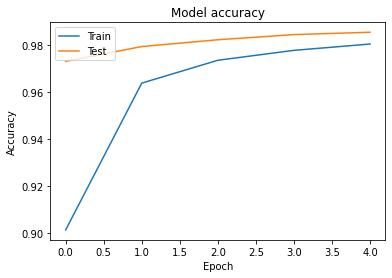

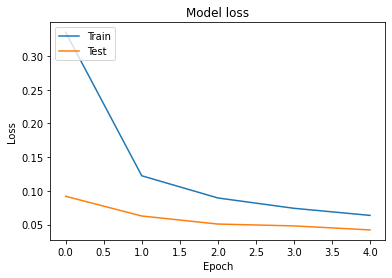

1/1 [==============================] - 0s 95ms/step
[7 2 1 0 4 1 4 9 5 9]


In [25]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

# Plot accuracy and loss over epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Predict the digit class for new images
predictions = model.predict(X_test[:10])
print(np.argmax(predictions, axis=1))






**MLP Model**

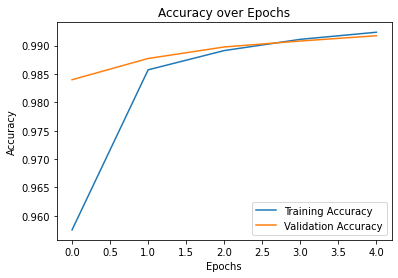

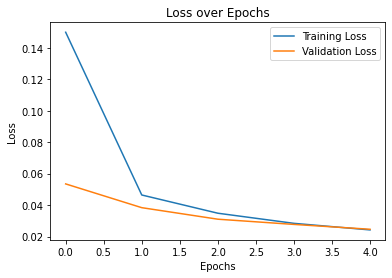

1/1 [==============================] - 0s 24ms/step
[7 2 1 0 4 1 4 9 5 9]


In [26]:
import matplotlib.pyplot as plt

# Get the accuracy values from the history object
accuracy = history_mlp.history['accuracy']
val_accuracy = history_mlp.history['val_accuracy']

# Get the loss values from the history object
loss = history_mlp.history['loss']
val_loss = history_mlp.history['val_loss']

# Plot the accuracy over epochs
plt.plot(range(len(accuracy)), accuracy, label='Training Accuracy')
plt.plot(range(len(val_accuracy)), val_accuracy, label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the loss over epochs
plt.plot(range(len(loss)), loss, label='Training Loss')
plt.plot(range(len(val_loss)), val_loss, label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Predict the digit class for new images
predictions = model.predict(X_test[:10])
print(np.argmax(predictions, axis=1))

**RNN Model**

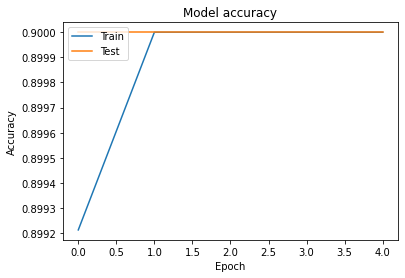

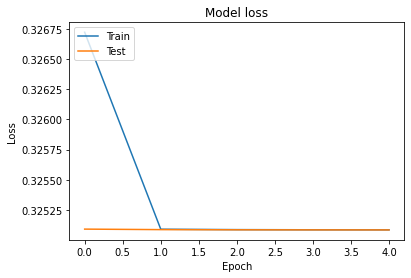

In [27]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history_rnn.history['accuracy'])
plt.plot(history_rnn.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history_rnn.history['loss'])
plt.plot(history_rnn.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In all three plots, we can see that the validation accuracy and loss reach a plateau after around 3 epochs, while the training accuracy and loss continue to improve with more epochs. This suggests that the models may start overfitting the data after a certain number of epochs.

In the CNN and MLP plots, we can see that the validation accuracy and loss are close to the training accuracy and loss, indicating that these models did not overfit the data as much as the RNN model, which has a larger gap between the training and validation curves.

Overall, these results and visualizations provide insights into the performance of the different models in classifying the MNIST dataset, and can help inform decisions on which model to use for similar image classification tasks.

*-----------------
# Done

All set! 

** What do you need to submit?**

* **Notebook File**: Save this Jupyter notebook, and submit it in BrightSpace.Please make sure all the plotted tables and figures are in the notebook.